(example_2)=
# Fitting single subject data using Bayesian estimation
Author: Nicolas Legrand <nicolas.legrand@cfin.au.dk>

In [ ]:
%%capture
import sys
if 'google.colab' in sys.modules:
    ! pip install metadpy

In [1]:
import arviz as az
import numpy as np
from metadpy.bayesian import hmetad

## From response-signal arrays

In [2]:
# Create responses data
nR_S1 = np.array([52, 32, 35, 37, 26, 12, 4, 2])
nR_S2 = np.array([2, 5, 15, 22, 33, 38, 40, 45])

This function will return two variable. The first one is a pymc model variable

In [3]:
model, traces = hmetad(nR_S1=nR_S1, nR_S2=nR_S2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/opt/anaconda3/lib/python3.8/site-packages/multipledispatch/dispatcher.py:27: AmbiguityWarning: 
Ambiguities exist in dispatched function _unify

The following signatures may result in ambiguous behavior:
	[ConstrainedVar, object, Mapping], [object, ConstrainedVar, Mapping]
	[ConstrainedVar, Var, Mapping], [object, ConstrainedVar, Mapping]
	[ConstrainedVar, Var, Mapping], [object, ConstrainedVar, Mapping]
	[object, ConstrainedVar, Mapping], [ConstrainedVar, object, Mapping]


Consider making the following additions:

@dispatch(ConstrainedVar, ConstrainedVar, Mapping)
def _unify(...)

@dispatch(ConstrainedVar, ConstrainedVar, Mapping)
def _unify(...)

@dispatch(ConstrainedVar, ConstrainedVar, Mapping)
def _unify(...)

@dispatch(ConstrainedVar, ConstrainedVar, Mapping)
def _unify(...)
  warn(warning_text(dispatcher.name, ambiguities), AmbiguityWarning)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [c1, d1, met

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 10 seconds.


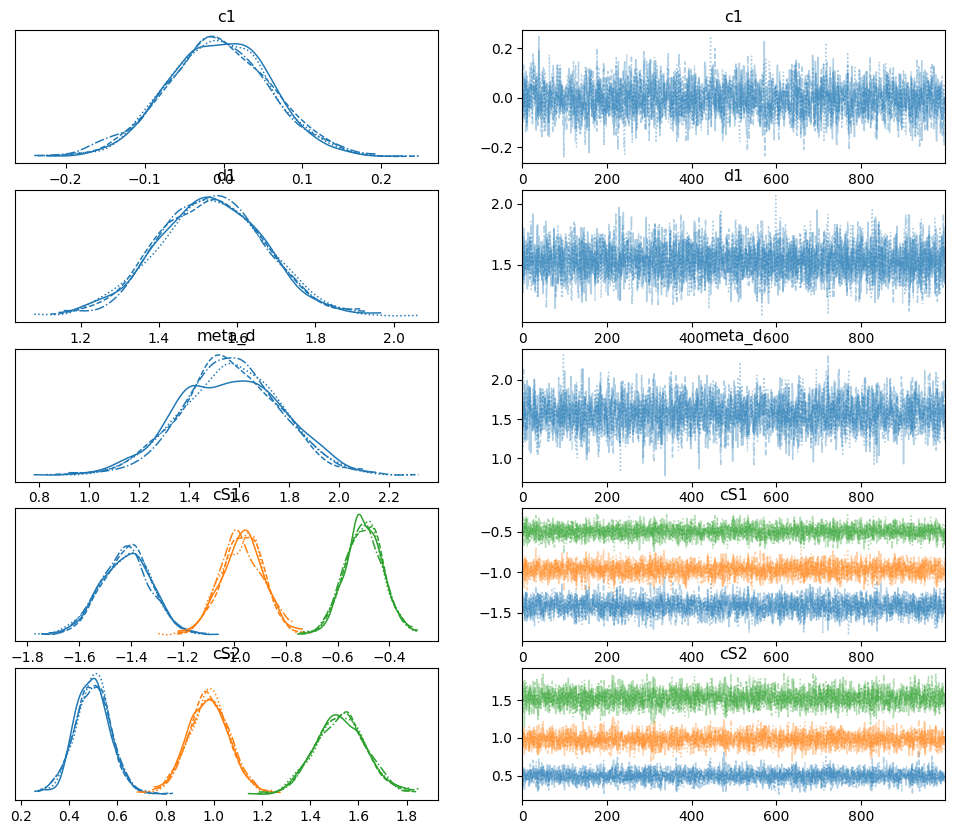

In [4]:
az.plot_trace(traces, var_names=["c1", "d1", "meta_d", "cS1", "cS2"]);

In [5]:
az.summary(traces, var_names=["c1", "d1", "meta_d", "cS1", "cS2"])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
c1,-0.006,0.066,-0.134,0.114,0.001,0.001,2550.0,2732.0,1.0
d1,1.534,0.135,1.266,1.773,0.002,0.001,4795.0,2992.0,1.0
meta_d,1.567,0.201,1.203,1.953,0.004,0.003,2700.0,2502.0,1.0
cS1[0],-1.419,0.097,-1.609,-1.250,0.002,0.001,3138.0,3726.0,1.0
cS1[1],-0.970,0.082,-1.117,-0.811,0.001,0.001,3263.0,3539.0,1.0
cS1[2],-0.500,0.072,-0.632,-0.360,0.001,0.001,3779.0,3149.0,1.0
cS2[0],0.496,0.074,0.363,0.642,0.001,0.001,3749.0,2656.0,1.0
cS2[1],0.980,0.085,0.807,1.130,0.002,0.001,2925.0,3061.0,1.0
cS2[2],1.527,0.104,1.330,1.721,0.002,0.001,3070.0,2894.0,1.0


## Watermark

In [6]:
%load_ext watermark
%watermark -n -u -v -iv -w -p metadpy,pytensor,pymc

Last updated: Mon Jan 16 2023

Python implementation: CPython
Python version       : 3.8.8
IPython version      : 8.4.0

metadpy : 0.0.1
pytensor: 2.8.11
pymc    : 5.0.1

numpy: 1.23.0
arviz: 0.13.0

Watermark: 2.3.1

